## Analysis of Video Games Sales in Japan¶

In this Project,I am going to analyze the Dataset of Video Game Sales in Japan. I got this dataset from kaggel:https://www.kaggle.com/gregorut/videogamesales

In this project, i am going to find which Game has Highest Sales, who ware the publisher and Genre, In Which Year it got the released and more on... . I'm going to use Pandas,numpy,Matplotlib and Seaborn for this Project.

The Dataset contains following information:-

* Rank - Ranking of overall sales,
* Name - The games name,
* Platform - Platform on which the games release (i.e. PC,PS4, etc.),
* Year - Year of the game's release,
* Genre - Genre of the game,
* Publisher - Publisher of the game,
* NA_Sales - Sales in North America (in millions),
* EU_Sales - Sales in Europe (in millions),
* JP_Sales - Sales in Japan (in millions),
* Other_Sales - Sales in the rest of the world (in millions),
* Global_Sales - Total worldwide sales.

## Downloading the Dataset

For this project we are going to download dataset from kaggle

Dataset link:- https://www.kaggle.com/gregorut/videogamesales

In [10]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [11]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [13]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./videogamesales" (use force=True to force download)


The dataset has been downloaded and extracted.

In [14]:
data_dir = './videogamesales'

In [15]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [16]:
project_name = "video-games-sales-analysis-in japan" 

In [17]:
!pip install jovian --upgrade -q

In [18]:
import jovian

In [19]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ashishdotc4/video-games-sales-analysis-in-japan" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan


'https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan'

## Data Preparation and Cleaning

In this step we first load the dataset using pandas after then we try find how many columns and rows try to get some insights using info and describe method.



In [20]:
import pandas as pd

In [21]:
sales_df=pd.read_csv(data_dir+"/vgsales.csv")
sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
sales_df.shape

(16598, 11)

> * Our dataset has total of 16598 rows and 11 columns.

In [23]:
sales_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

> * Following are the columns present in our dataset, Here NA_Sales represents Sales of video games in North America (in millions), EU_Sales represents Sales of video games in Europe (in millions), while JP_Sales represents Sales of video games  in Japan (in millions)

In [24]:
sales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


> sales_df.describe() gives some insights about our data like what is the mean sales of video games in different region, what is the max sales of video games in different region, what is the 50% sales of video games in different region

* As i'm  only working with Japan region so i will drop the all the unneccessary column that i'm  not going to use.

In [25]:
jp_sales_df=sales_df.drop(['NA_Sales','EU_Sales', 'Other_Sales', 'Global_Sales'],axis=1)
jp_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22
...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00


In [26]:
jp_sales_df.shape

(16598, 7)

> * After Droping we hae now only 7 columns and that all i need 

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ashishdotc4/video-games-sales-analysis-in-japan" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan


'https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan'

## Exploratory Analysis and Visualization

In this Step, I Will try to Visualize Some data from our dataset using matplotlib.pyplot and seaborn



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Q. Plot a Graph of Top 20 Most Saled Video Games

In [30]:
jp_sales_df_order=jp_sales_df.sort_values("JP_Sales",ascending=False)
jp_sales_df_order

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,7.20
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6.50
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.04
...,...,...,...,...,...,...,...
7166,7168,Cloudy With a Chance of Meatballs,DS,2009.0,Platform,Ubisoft,0.00
7167,7169,MotoGP 08,PS2,2008.0,Racing,Capcom,0.00
7168,7170,Madden NFL 12,PSP,2011.0,Sports,Electronic Arts,0.00
7172,7174,Ford vs. Chevy,PS2,2005.0,Racing,Global Star,0.00


In [31]:
jp_sales_df_20=jp_sales_df_order.head(20)
jp_sales_df_20

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,7.20
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6.50
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.04
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.65
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,5.38
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,5.33
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,5.32
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,4.87


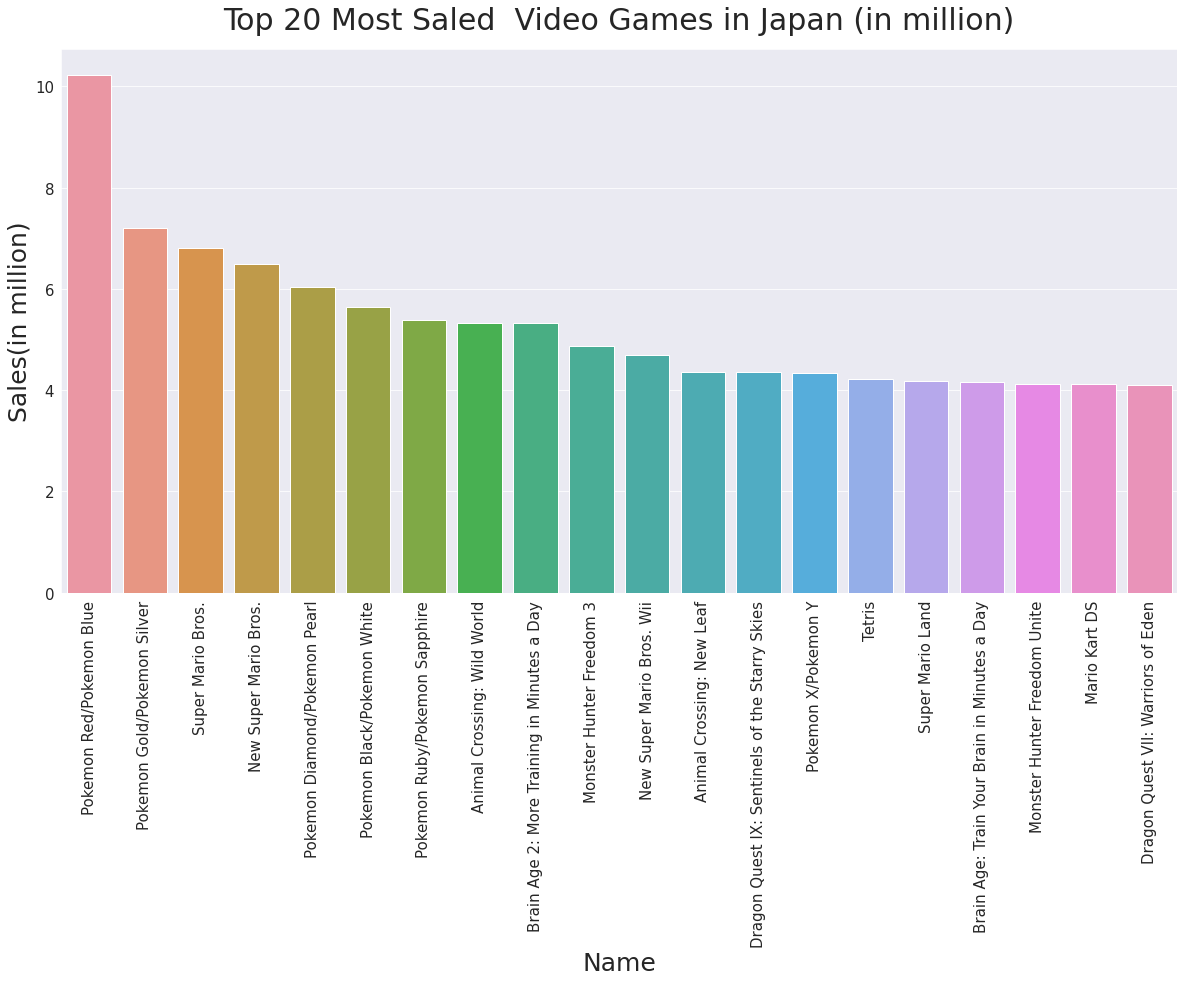

In [32]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Name',  y ='JP_Sales', data = jp_sales_df_20);
plt.title("Top 20 Most Saled  Video Games in Japan (in million)",fontsize=30,pad=20);
plt.xlabel('Name',fontsize=25)
plt.ylabel('Sales(in million)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)

Pokemon Red/Pokemon Blue is the highest Selling Video Game in Japan With the  Sale of Over 10.22 millions

## Q.Plot a Graph of Top 20 Least Saled Video Games in Japan

In [33]:
jp_sales_df_order=jp_sales_df.sort_values("JP_Sales",ascending=True)
jp_sales_df_order

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
8298,8300,The Lord of the Rings: Aragorn's Quest,PS3,2010.0,Action,Warner Bros. Interactive Entertainment,0.00
9636,9638,The Stronghold Collection,PC,2009.0,Strategy,Take-Two Interactive,0.00
9639,9641,Mega Man X Collection,GC,2006.0,Misc,Capcom,0.00
9641,9643,Dragon Ball: Origins,DS,2008.0,Action,Atari,0.00
9643,9645,Quantum Redshift,XB,2002.0,Racing,Microsoft Game Studios,0.00
...,...,...,...,...,...,...,...
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.04
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6.50
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,7.20


In [34]:
jp_sales_df_least_20=jp_sales_df_order.head(20)
jp_sales_df_least_20

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
8298,8300,The Lord of the Rings: Aragorn's Quest,PS3,2010.0,Action,Warner Bros. Interactive Entertainment,0.0
9636,9638,The Stronghold Collection,PC,2009.0,Strategy,Take-Two Interactive,0.0
9639,9641,Mega Man X Collection,GC,2006.0,Misc,Capcom,0.0
9641,9643,Dragon Ball: Origins,DS,2008.0,Action,Atari,0.0
9643,9645,Quantum Redshift,XB,2002.0,Racing,Microsoft Game Studios,0.0
9644,9646,Smash Court Tennis Pro Tournament 2,PS2,2004.0,Sports,Sony Computer Entertainment,0.0
9645,9647,Eat Lead: The Return of Matt Hazard,X360,2009.0,Shooter,D3Publisher,0.0
9646,9648,Battleborn,XOne,2016.0,Shooter,Take-Two Interactive,0.0
9647,9649,Legends of Wrestling II,XB,2002.0,Fighting,Acclaim Entertainment,0.0
9649,9651,Armed and Dangerous,XB,2003.0,Shooter,LucasArts,0.0


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


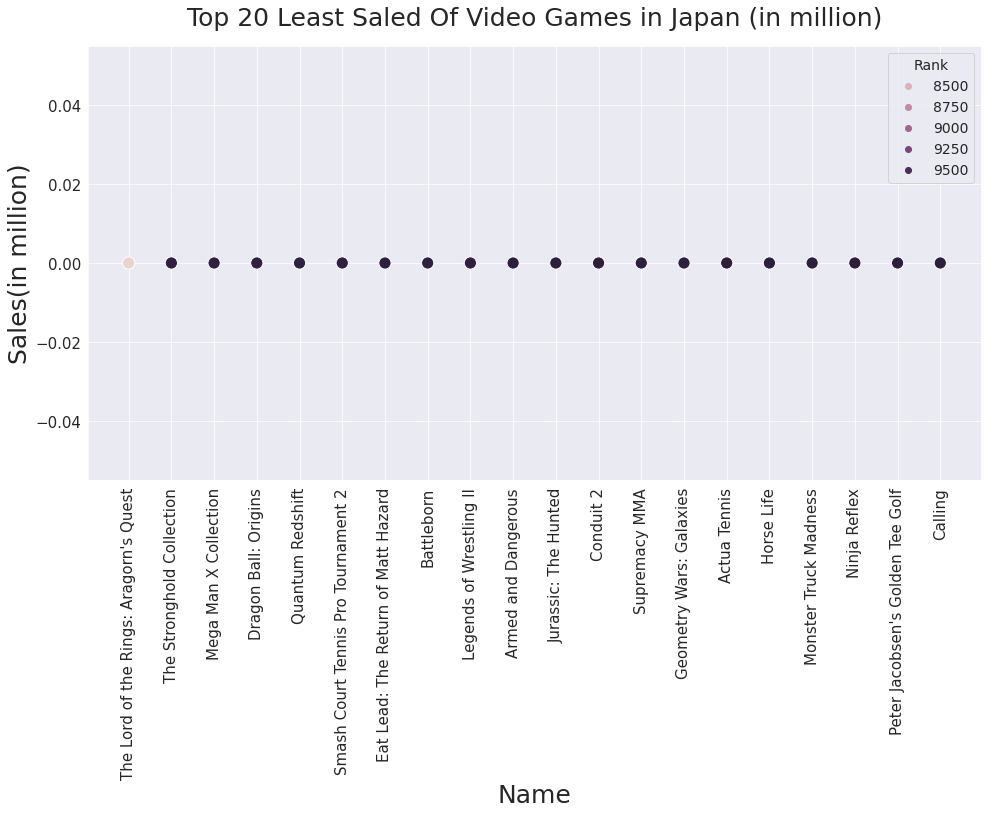

In [35]:
plt.figure(figsize=(16,8))
plt.title("Top 20 Least Saled Of Video Games in Japan (in million)",fontsize=25,pad=20);
plt.xlabel('Name',fontsize=25)
plt.ylabel('Sales(in million)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
sns.scatterplot(jp_sales_df_least_20.Name,jp_sales_df_least_20.JP_Sales,hue=jp_sales_df_least_20.Rank,s=150,data=jp_sales_df_least_20);

## Q.Plot a Graph  Of Which Shooter Game Has Highest Sale in Year 2015.

In [58]:
genre_df=year_df.query('Genre =="Shooter"')
genre_df


,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,0.35
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,0.22
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,0.01
235,236,Splatoon,WiiU,2015.0,Shooter,Nintendo,1.44
260,261,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,0.03
378,379,Star Wars Battlefront (2015),XOne,2015.0,Shooter,Electronic Arts,0.02
467,468,Gears of War: Ultimate Edition,XOne,2015.0,Shooter,Microsoft Game Studios,0.00
758,760,Tom Clancy's Rainbow Six: Siege,PS4,2015.0,Shooter,Ubisoft,0.13
797,799,Battlefield: Hardline,PS4,2015.0,Shooter,Electronic Arts,0.14
905,907,Destiny: The Taken King,PS4,2015.0,Shooter,Activision,0.04


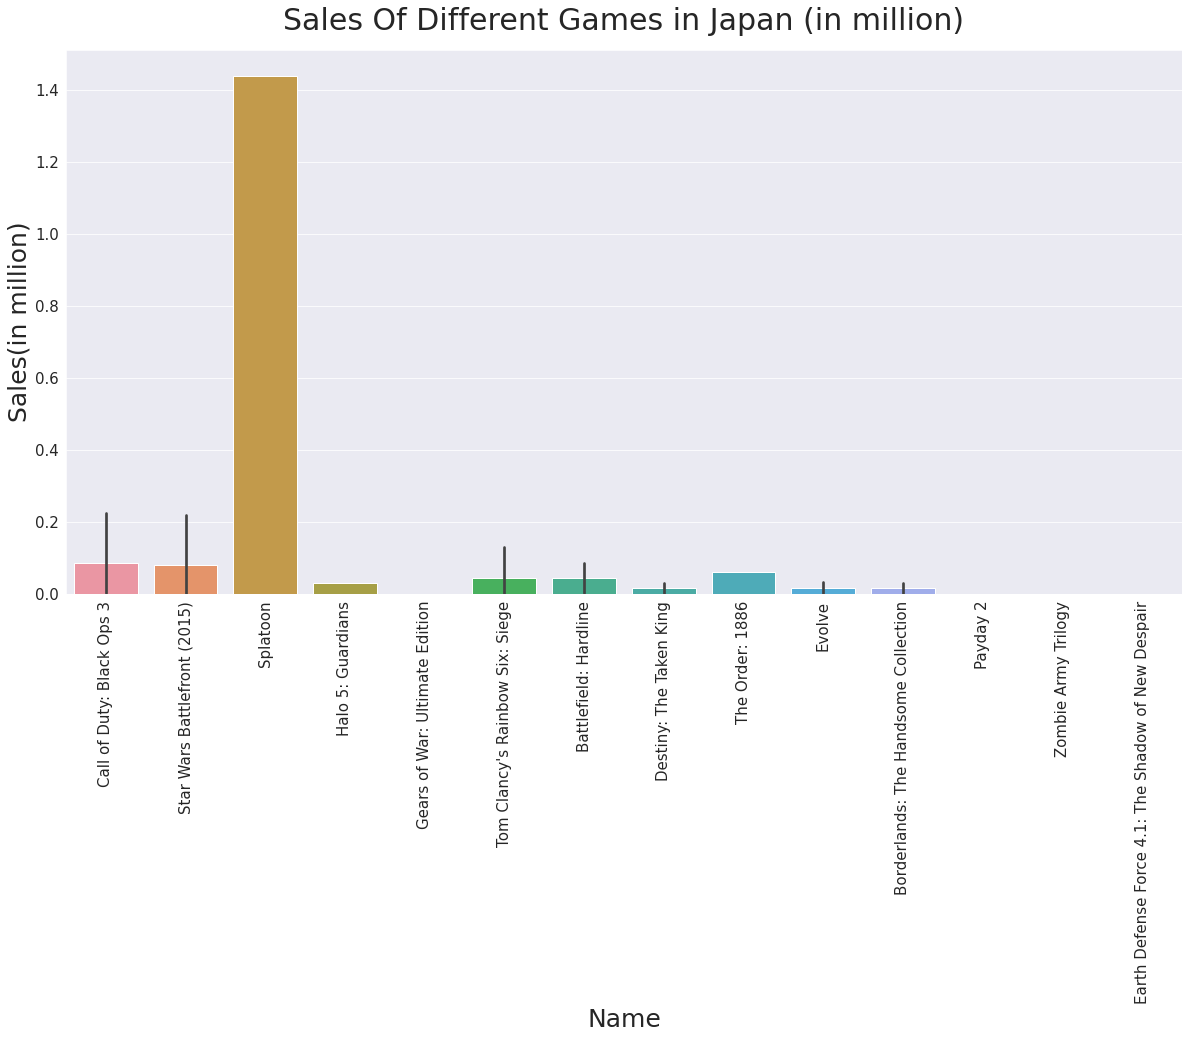

In [59]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Name',  y ='JP_Sales', data = genre_df);
plt.title("Sales Of Different Games in Japan (in million)",fontsize=30,pad=20);
plt.xlabel('Name',fontsize=25)
plt.ylabel('Sales(in million)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)

## Q.Plot the Graph of First 30 Data With their Publisher??

In [38]:
jp_sales_df_top_30=jp_sales_df.head(30)
jp_sales_df_top_30

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,4.22
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6.50
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,2.93
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,4.70
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,0.28


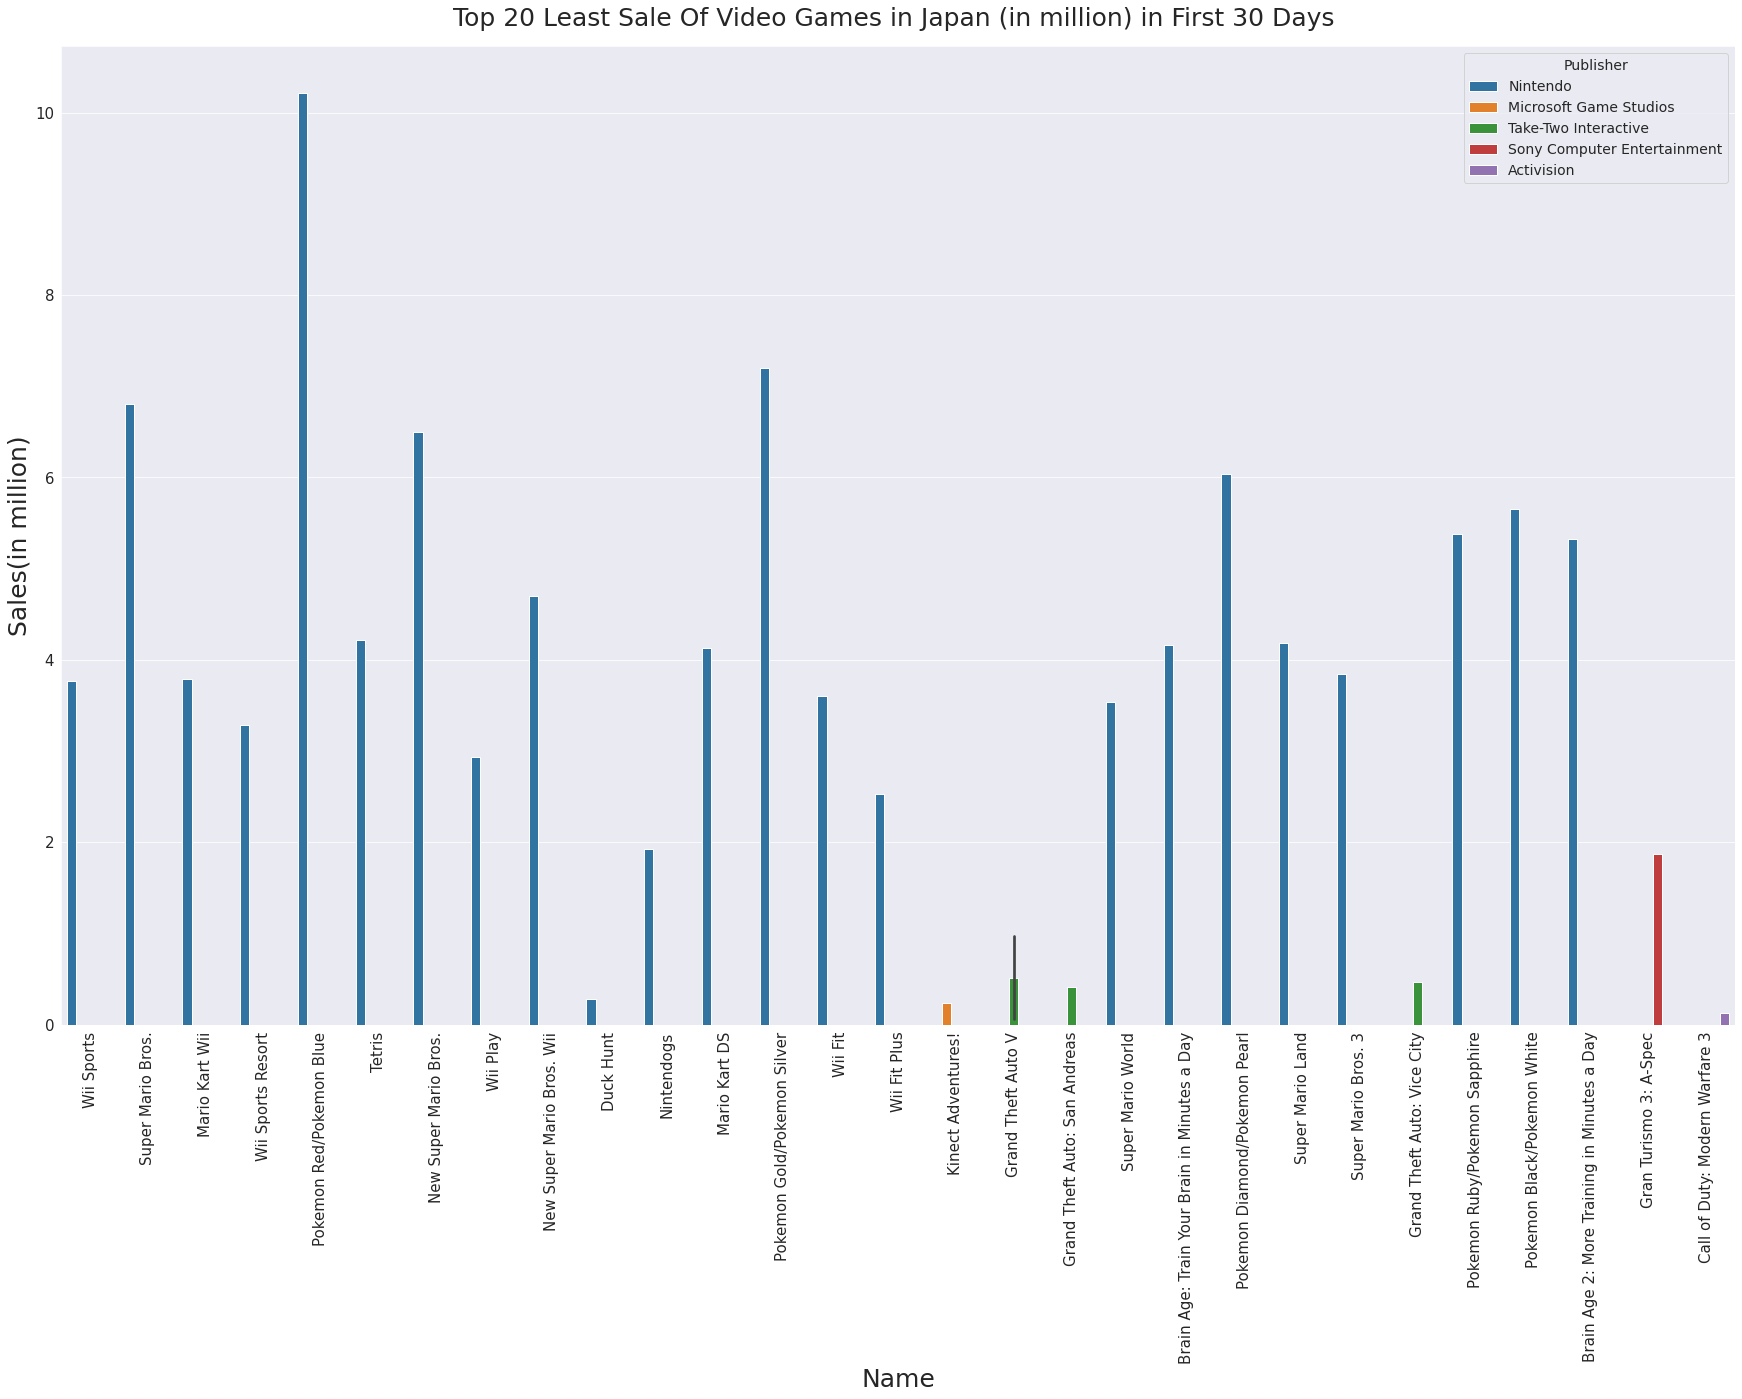

In [39]:
plt.figure(figsize=(30,18))
sns.barplot(x = 'Name',  y ='JP_Sales', data = jp_sales_df_top_30,hue="Publisher");
plt.title("Top 20 Least Sale Of Video Games in Japan (in million) in First 30 Days ",fontsize=25,pad=20);
plt.xlabel('Name',fontsize=25)
plt.ylabel('Sales(in million)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)


### Seems Like Nintendo	has Published Most Games in First 30 Data 

## Q. Plot Graph of Sales In Every Year

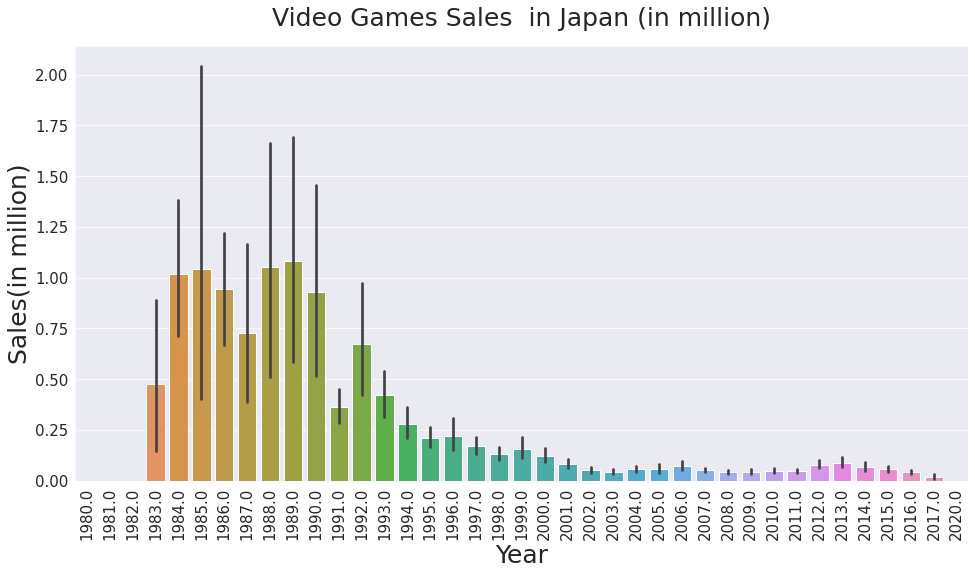

In [40]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'Year',  y ='JP_Sales', data = jp_sales_df);
plt.title("Video Games Sales  in Japan (in million)",fontsize=25,pad=20);
plt.xlabel('Year',fontsize=25)
plt.ylabel('Sales(in million)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)


Let us save and upload our work to Jovian before continuing

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ashishdotc4/video-games-sales-analysis-in-japan" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan


'https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan'

## Asking and Answering Questions

In this Step,We are to answer Some Intresting question Like How many Games did Nintendo Published ??, How Many Adventure Games are there ??,How many Games were Published in year 2015 ?? ,Which Game Has Highest Sales in Japan ?? etc..



#### Q1: How many Games did Nintendo Published ??

In [43]:
Nintendo_df=jp_sales_df.query('Publisher=="Nintendo"')
Nintendo_df

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22
...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.01


* Nintendo Published approx 703 Games . For finding this i use query function of pandas 

#### Q2: How Many Adventure Games are present  in  our Dataset ??

In [44]:
Adventure_Genre_df=jp_sales_df.query('Genre =="Adventure"')
Adventure_Genre_df

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,2.69
158,159,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,0.07
218,219,Assassin's Creed,PS3,2007.0,Adventure,Ubisoft,0.09
251,252,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,1.61
400,401,Rugrats: Search For Reptar,PS,1998.0,Adventure,THQ,0.00
...,...,...,...,...,...,...,...
16572,16575,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,Kadokawa Shoten,0.01
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.01
16580,16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00


* There are total 1286 Adventures Game Present in our Dataset

#### Q3:  How many Games were Published in year 2015 ??

In [45]:
year_df=jp_sales_df.query('Year == 2015.0')
year_df

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,0.35
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,0.06
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,0.22
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,0.01
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,0.24
...,...,...,...,...,...,...,...
16499,16502,Irotoridori no Sekai: World's End Re-Birth,PSV,2015.0,Action,HuneX,0.01
16528,16531,Kiniro no Corda 3,3DS,2015.0,Adventure,Tecmo Koei,0.01
16542,16545,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,Nintendo,0.01
16548,16551,Hakuoki: Reimeiroku - Omouhase Kara,PSV,2015.0,Action,Idea Factory,0.01


> * There are 614 Games were Published in year 2015

#### Q4: Which Game Has Highest Sales in Japan ??

> * For finding this we use pd.sort_values() to arrange them in asending order

In [46]:
highest_game_sales_df=jp_sales_df.sort_values("JP_Sales",ascending=False)
highest_game_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,7.20
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6.50
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.04
...,...,...,...,...,...,...,...
7166,7168,Cloudy With a Chance of Meatballs,DS,2009.0,Platform,Ubisoft,0.00
7167,7169,MotoGP 08,PS2,2008.0,Racing,Capcom,0.00
7168,7170,Madden NFL 12,PSP,2011.0,Sports,Electronic Arts,0.00
7172,7174,Ford vs. Chevy,PS2,2005.0,Racing,Global Star,0.00


* Pokemon Red/Pokemon Blue has highest Sale in Japan with the  Sale of Over 10.22 millions

#### Q5:How Many Shooting Games Were Published in Year 2015 ??

In [47]:
year_df=jp_sales_df.query('Year == 2015.0')
year_df

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,0.35
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,0.06
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,0.22
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,0.01
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,0.24
...,...,...,...,...,...,...,...
16499,16502,Irotoridori no Sekai: World's End Re-Birth,PSV,2015.0,Action,HuneX,0.01
16528,16531,Kiniro no Corda 3,3DS,2015.0,Adventure,Tecmo Koei,0.01
16542,16545,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,Nintendo,0.01
16548,16551,Hakuoki: Reimeiroku - Omouhase Kara,PSV,2015.0,Action,Idea Factory,0.01


In [48]:
genre_df=year_df.query('Genre =="Shooter"')
genre_df

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,0.35
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,0.22
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,0.01
235,236,Splatoon,WiiU,2015.0,Shooter,Nintendo,1.44
260,261,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,0.03
378,379,Star Wars Battlefront (2015),XOne,2015.0,Shooter,Electronic Arts,0.02
467,468,Gears of War: Ultimate Edition,XOne,2015.0,Shooter,Microsoft Game Studios,0.00
758,760,Tom Clancy's Rainbow Six: Siege,PS4,2015.0,Shooter,Ubisoft,0.13
797,799,Battlefield: Hardline,PS4,2015.0,Shooter,Electronic Arts,0.14
905,907,Destiny: The Taken King,PS4,2015.0,Shooter,Activision,0.04


In [49]:
genre_df.shape

(34, 7)

> * There are 34 Shooting Games were Published in 2015

Let us save and upload our work to Jovian before continuing.

In [50]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ashishdotc4/video-games-sales-analysis-in-japan" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan


'https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan'

## Inferences and Conclusion
 
From this Analysis We Can Conclude that there are 16598 rows × 11 columns total present in Dataset bt we only need 7 columns so we  drop Other.

**Key Points**: 	
* Pokemon Red/Pokemon Blue has highest Sale in Japan with the Sale of Over 10.22 millions
* The minimum Sale of Game is 0.077782	
* In year 2015,614 Games were Published 
* Nintendo has Published approx 703 Games
* There are total 1286 Adventures Game Present in our Dataset



In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ashishdotc4/video-games-sales-analysis-in-japan" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan


'https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan'

## References and Future Work

We Can Extend this by finding the Different region Present in dataset like North America,Global Sales,Europe Sales etc..



In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ashishdotc4/video-games-sales-analysis-in-japan" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan


'https://jovian.ai/ashishdotc4/video-games-sales-analysis-in-japan'